In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_adm = pd.read_csv('ADMISSIONS.csv')

In [2]:
print("Total number of records : ",len(df_adm))
print("Total number of columns : ",len(df_adm.columns))

Total number of records :  58976
Total number of columns :  19


In [3]:
print("Finding missing values ... ")
df_adm.isnull().sum()

Finding missing values ... 


ROW_ID                      0
SUBJECT_ID                  0
HADM_ID                     0
ADMITTIME                   0
DISCHTIME                   0
DEATHTIME               53122
ADMISSION_TYPE              0
ADMISSION_LOCATION          0
DISCHARGE_LOCATION          0
INSURANCE                   0
LANGUAGE                25332
RELIGION                  458
MARITAL_STATUS          10128
ETHNICITY                   0
EDREGTIME               28099
EDOUTTIME               28099
DIAGNOSIS                  25
HOSPITAL_EXPIRE_FLAG        0
HAS_CHARTEVENTS_DATA        0
dtype: int64

In [4]:
print("Group Admission Types")
print(df_adm.groupby(['ADMISSION_TYPE']).size())
print(df_adm.groupby(['ETHNICITY']).size())
print(df_adm.groupby(['DIAGNOSIS']).size())

Group Admission Types
ADMISSION_TYPE
ELECTIVE      7706
EMERGENCY    42071
NEWBORN       7863
URGENT        1336
dtype: int64
ETHNICITY
AMERICAN INDIAN/ALASKA NATIVE                                  51
AMERICAN INDIAN/ALASKA NATIVE FEDERALLY RECOGNIZED TRIBE        3
ASIAN                                                        1509
ASIAN - ASIAN INDIAN                                           85
ASIAN - CAMBODIAN                                              17
ASIAN - CHINESE                                               277
ASIAN - FILIPINO                                               25
ASIAN - JAPANESE                                                7
ASIAN - KOREAN                                                 13
ASIAN - OTHER                                                  17
ASIAN - THAI                                                    4
ASIAN - VIETNAMESE                                             53
BLACK/AFRICAN                                                  44
BLACK/

In [5]:
print("Converting Date string to Datetime object ...")
df_adm.ADMITTIME = pd.to_datetime(df_adm.ADMITTIME, format = '%Y-%m-%d %H:%M:%S', errors = 'coerce')
df_adm.DISCHTIME = pd.to_datetime(df_adm.DISCHTIME, format = '%Y-%m-%d %H:%M:%S', errors = 'coerce')

print('Number of missing date admissions:', df_adm.ADMITTIME.isnull().sum())
print('Number of missing date discharges:', df_adm.DISCHTIME.isnull().sum())

Converting Date string to Datetime object ...
Number of missing date admissions: 0
Number of missing date discharges: 0


In [6]:
print("Sorting the dataset by SUBJECT_ID and ADMITTIME ...")
df_adm = df_adm.sort_values(['SUBJECT_ID','ADMITTIME'])
df_adm = df_adm.reset_index(drop = True)

Sorting the dataset by SUBJECT_ID and ADMITTIME ...


In [7]:
df_adm.loc[df_adm.SUBJECT_ID == 124,['SUBJECT_ID','ADMITTIME','ADMISSION_TYPE']]

,SUBJECT_ID,ADMITTIME,ADMISSION_TYPE
165,124,2160-06-24 21:25:00,EMERGENCY
166,124,2161-12-17 03:39:00,EMERGENCY
167,124,2165-05-21 21:02:00,ELECTIVE
168,124,2165-12-31 18:55:00,EMERGENCY


In [8]:
print("Adding NEXT_ADMITTIME and NEXT_ADMISSION_TYPE for every record ...")
df_adm['NEXT_ADMITTIME'] = df_adm.groupby('SUBJECT_ID').ADMITTIME.shift(-1)
df_adm['NEXT_ADMISSION_TYPE'] = df_adm.groupby('SUBJECT_ID').ADMISSION_TYPE.shift(-1)
df_adm['LENGTH_OF_STAY'] = (df_adm.DISCHTIME - df_adm.ADMITTIME).dt.total_seconds()/(24*60*60)

Adding NEXT_ADMITTIME and NEXT_ADMISSION_TYPE for every record ...


In [9]:
print(df_adm.loc[df_adm.SUBJECT_ID == 124,['SUBJECT_ID','ADMITTIME','DISCHTIME','ADMISSION_TYPE','LENGTH_OF_STAY','NEXT_ADMITTIME','NEXT_ADMISSION_TYPE']])
print(df_adm.loc[df_adm.SUBJECT_ID == 5246,['SUBJECT_ID','ADMITTIME','DISCHTIME','ADMISSION_TYPE','LENGTH_OF_STAY','NEXT_ADMITTIME','NEXT_ADMISSION_TYPE']])

     SUBJECT_ID           ADMITTIME           DISCHTIME ADMISSION_TYPE  \
165         124 2160-06-24 21:25:00 2160-07-15 15:10:00      EMERGENCY   
166         124 2161-12-17 03:39:00 2161-12-24 15:35:00      EMERGENCY   
167         124 2165-05-21 21:02:00 2165-06-06 16:00:00       ELECTIVE   
168         124 2165-12-31 18:55:00 2166-02-01 06:55:00      EMERGENCY   

     LENGTH_OF_STAY      NEXT_ADMITTIME NEXT_ADMISSION_TYPE  
165       20.739583 2161-12-17 03:39:00           EMERGENCY  
166        7.497222 2165-05-21 21:02:00            ELECTIVE  
167       15.790278 2165-12-31 18:55:00           EMERGENCY  
168       31.500000                 NaT                 NaN  
      SUBJECT_ID           ADMITTIME           DISCHTIME ADMISSION_TYPE  \
6384        5246 2185-11-14 08:36:00 2185-12-21 18:15:00      EMERGENCY   
6385        5246 2185-12-02 23:53:00 2185-12-21 18:15:00      EMERGENCY   

      LENGTH_OF_STAY      NEXT_ADMITTIME NEXT_ADMISSION_TYPE  
6384       37.402083 2185-12-0

In [10]:
print("Elective readmission should not be considered ...")
rows = df_adm.NEXT_ADMISSION_TYPE == 'ELECTIVE'
df_adm.loc[rows,['NEXT_ADMITTIME']] = pd.NaT
df_adm.loc[rows,['NEXT_ADMISSION_TYPE']] = np.NaN

Elective readmission should not be considered ...


In [11]:
df_adm.loc[df_adm.SUBJECT_ID == 124,['SUBJECT_ID','ADMITTIME','ADMISSION_TYPE','NEXT_ADMITTIME','NEXT_ADMISSION_TYPE']]

,SUBJECT_ID,ADMITTIME,ADMISSION_TYPE,NEXT_ADMITTIME,NEXT_ADMISSION_TYPE
165,124,2160-06-24 21:25:00,EMERGENCY,2161-12-17 03:39:00,EMERGENCY
166,124,2161-12-17 03:39:00,EMERGENCY,NaT,NaN
167,124,2165-05-21 21:02:00,ELECTIVE,2165-12-31 18:55:00,EMERGENCY
168,124,2165-12-31 18:55:00,EMERGENCY,NaT,NaN


In [12]:
print("Sorting the dataset by SUBJECT_ID and ADMITTIME ...")
df_adm = df_adm.sort_values(['SUBJECT_ID','ADMITTIME'])

print("Again fill the values ...")
df_adm[['NEXT_ADMITTIME','NEXT_ADMISSION_TYPE']] = df_adm.groupby(['SUBJECT_ID'])[['NEXT_ADMITTIME','NEXT_ADMISSION_TYPE']].fillna(method = 'bfill')

Sorting the dataset by SUBJECT_ID and ADMITTIME ...
Again fill the values ...


In [13]:
df_adm.loc[df_adm.SUBJECT_ID == 124,['SUBJECT_ID','ADMITTIME','DISCHTIME','ADMISSION_TYPE','NEXT_ADMITTIME','NEXT_ADMISSION_TYPE']]

,SUBJECT_ID,ADMITTIME,DISCHTIME,ADMISSION_TYPE,NEXT_ADMITTIME,NEXT_ADMISSION_TYPE
165,124,2160-06-24 21:25:00,2160-07-15 15:10:00,EMERGENCY,2161-12-17 03:39:00,EMERGENCY
166,124,2161-12-17 03:39:00,2161-12-24 15:35:00,EMERGENCY,2165-12-31 18:55:00,EMERGENCY
167,124,2165-05-21 21:02:00,2165-06-06 16:00:00,ELECTIVE,2165-12-31 18:55:00,EMERGENCY
168,124,2165-12-31 18:55:00,2166-02-01 06:55:00,EMERGENCY,NaT,NaN


In [14]:
print("Calculating days between discharge and readmission ...")
df_adm['DAYS_NEXT_ADMIT'] = (df_adm.NEXT_ADMITTIME - df_adm.DISCHTIME).dt.total_seconds()/(24*60*60)

Calculating days between discharge and readmission ...


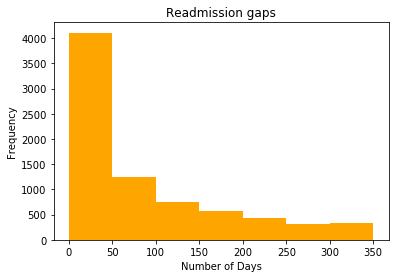

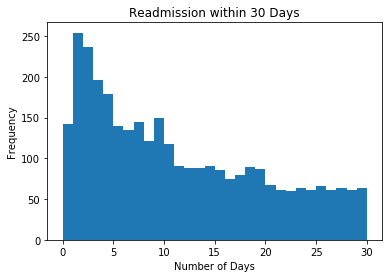

In [15]:
re_add_time = df_adm.loc[~df_adm.DAYS_NEXT_ADMIT.isnull(),'DAYS_NEXT_ADMIT']
re_add_time = [x for x in re_add_time if x > 0] or None
plt.hist(list(re_add_time), bins = range(0,365+30,50), color = "orange")
plt.xlabel("Number of Days")
plt.ylabel("Frequency")
plt.title("Readmission gaps")
plt.show()
plt.hist(list(re_add_time), bins = 30, range = (0,30))
plt.xlabel("Number of Days")
plt.ylabel("Frequency")
plt.title("Readmission within 30 Days")
plt.show()

In [16]:
print("Number of patients with readmissions:", (~df_adm.DAYS_NEXT_ADMIT.isnull()).sum())
print("Total number:",len(df_adm))

Number of patients with readmissions: 11399
Total number: 58976


In [17]:
df_notes = pd.read_csv("only_discharge_summaries.csv")

In [18]:
print("Total number of notes : ",len(df_notes))
print("Total number of columns : ",len(df_notes.columns))
df_notes.columns

Total number of notes :  59652
Total number of columns :  11


Index(['ROW_ID', 'SUBJECT_ID', 'HADM_ID', 'CHARTDATE', 'CHARTTIME',
       'STORETIME', 'CATEGORY', 'DESCRIPTION', 'CGID', 'ISERROR', 'TEXT'],
      dtype='object')

In [19]:
df_notes.groupby(['CATEGORY']).size()

CATEGORY
Discharge summary    59652
dtype: int64

In [20]:
df_notes.TEXT.iloc[0]

'Admission Date:  [**2151-7-16**]       Discharge Date:  [**2151-8-4**]\n\n\nService:\nADDENDUM:\n\nRADIOLOGIC STUDIES:  Radiologic studies also included a chest\nCT, which confirmed cavitary lesions in the left lung apex\nconsistent with infectious process/tuberculosis.  This also\nmoderate-sized left pleural effusion.\n\nHEAD CT:  Head CT showed no intracranial hemorrhage or mass\neffect, but old infarction consistent with past medical\nhistory.\n\nABDOMINAL CT:  Abdominal CT showed lesions of\nT10 and sacrum most likely secondary to osteoporosis. These can\nbe followed by repeat imaging as an outpatient.\n\n\n\n                            [**First Name8 (NamePattern2) **] [**First Name4 (NamePattern1) 1775**] [**Last Name (NamePattern1) **], M.D.  [**MD Number(1) 1776**]\n\nDictated By:[**Hospital 1807**]\nMEDQUIST36\n\nD:  [**2151-8-5**]  12:11\nT:  [**2151-8-5**]  12:21\nJOB#:  [**Job Number 1808**]\n'

In [21]:
df_notes_dis_sum = df_notes
# assert df_notes_dis_sum.duplicated(['HADM_ID']).sum() == 0, 'Multiple discharge notes per admission'

In [22]:
df_notes_dis_sum_last = (df_notes_dis_sum.groupby(['SUBJECT_ID','HADM_ID']).nth(-1)).reset_index()
assert df_notes_dis_sum_last.duplicated(['HADM_ID']).sum() == 0, 'Multiple discharge notes per admission'

In [23]:
df_adm_notes = pd.merge(df_adm[['SUBJECT_ID','HADM_ID','ADMITTIME','DISCHTIME','DAYS_NEXT_ADMIT','LENGTH_OF_STAY','NEXT_ADMITTIME','ADMISSION_TYPE','DEATHTIME']],
                        df_notes_dis_sum_last[['SUBJECT_ID','HADM_ID','TEXT']], 
                        on = ['SUBJECT_ID','HADM_ID'],
                        how = 'left')
assert len(df_adm) == len(df_adm_notes), 'Number of rows increased'

In [24]:
df_adm_notes.groupby('ADMISSION_TYPE').apply(lambda g: g.TEXT.isnull().sum())/df_adm_notes.groupby('ADMISSION_TYPE').size()

ADMISSION_TYPE
ELECTIVE     0.048663
EMERGENCY    0.037983
NEWBORN      0.536691
URGENT       0.042665
dtype: float64

In [25]:
df_adm_notes_clean = df_adm_notes.loc[df_adm_notes.ADMISSION_TYPE != 'NEWBORN'].copy()

In [26]:
df_adm_notes_clean['OUTPUT_LABEL'] = (df_adm_notes_clean.DAYS_NEXT_ADMIT < 30).astype('int')

In [27]:
print('Number of positive samples:', (df_adm_notes_clean.OUTPUT_LABEL == 1).sum())
print('Number of negative samples:',  (df_adm_notes_clean.OUTPUT_LABEL == 0).sum())
print('Total samples:', len(df_adm_notes_clean))

Number of positive samples: 3004
Number of negative samples: 48109
Total samples: 51113


In [28]:
import math
print("Correlation Analysis of Length of stay versus Readmission variable ...")
length_of_stay = df_adm_notes_clean['LENGTH_OF_STAY']
readmission = df_adm_notes_clean['OUTPUT_LABEL']
correlation = ((length_of_stay*readmission).sum()-((length_of_stay.sum()*readmission.sum())/(len(length_of_stay))))/math.sqrt(((length_of_stay*length_of_stay).sum()-((length_of_stay).sum()**2/(len(length_of_stay))))*((readmission*readmission).sum()-((readmission).sum()**2/(len(readmission)))))
print(correlation)

Correlation Analysis of Length of stay versus Readmission variable ...
0.05849616301862751


In [29]:
# shuffle the samples
df_adm_notes_clean = df_adm_notes_clean.sample(n = len(df_adm_notes_clean), random_state = 42)
df_adm_notes_clean = df_adm_notes_clean.reset_index(drop = True)

# Save 30% of the data as validation and test data 
df_valid_test=df_adm_notes_clean.sample(frac=0.30,random_state=42)

df_test = df_valid_test.sample(frac = 0.5, random_state = 42)
df_valid = df_valid_test.drop(df_test.index)

# use the rest of the data as training data
df_train_all=df_adm_notes_clean.drop(df_valid_test.index)

print('Test prevalence(n = %d):'%len(df_test),df_test.OUTPUT_LABEL.sum()/ len(df_test))
print('Valid prevalence(n = %d):'%len(df_valid),df_valid.OUTPUT_LABEL.sum()/ len(df_valid))
print('Train all prevalence(n = %d):'%len(df_train_all), df_train_all.OUTPUT_LABEL.sum()/ len(df_train_all))
print('Total number of samples (n = %d)'%len(df_adm_notes_clean))
assert len(df_adm_notes_clean) == (len(df_test)+len(df_valid)+len(df_train_all)),'math didnt work'

Test prevalence(n = 7667): 0.061953828094430674
Valid prevalence(n = 7667): 0.056997521846876224
Train all prevalence(n = 35779): 0.05847005226529529
Total number of samples (n = 51113)


In [30]:
# split the training data into positive and negative
rows_pos = df_train_all.OUTPUT_LABEL == 1
df_train_pos = df_train_all.loc[rows_pos]
df_train_neg = df_train_all.loc[~rows_pos]

# merge the balanced data
df_train = pd.concat([df_train_pos, df_train_neg.sample(n = len(df_train_pos), random_state = 42)],axis = 0)

# shuffle the order of training samples 
df_train = df_train.sample(n = len(df_train), random_state = 42).reset_index(drop = True)

print('Train prevalence (n = %d):'%len(df_train), df_train.OUTPUT_LABEL.sum()/ len(df_train))

Train prevalence (n = 4184): 0.5


In [31]:
def preprocess_text(df):
    df.TEXT = df.TEXT.fillna(' ')
    df.TEXT = df.TEXT.str.replace('\n',' ')
    df.TEXT = df.TEXT.str.replace('\r',' ')
    return df

In [32]:
import nltk
from nltk import word_tokenize
import string
from nltk.stem.snowball import EnglishStemmer

In [33]:
def tokenizer_better(text):
    # tokenize the text by replacing punctuation and numbers with spaces and lowercase all words
    
    punc_list = string.punctuation+'0123456789'
    t = str.maketrans(dict.fromkeys(punc_list, " "))
    text = text.lower().translate(t)
    tokens = word_tokenize(text)
#     tokens = [EnglishStemmer().stem(token) for token in tokens]
    return tokens

In [34]:
import string
print("Preprocessing unstructured text ...")
df_train = preprocess_text(df_train)
df_valid = preprocess_text(df_valid)
df_test = preprocess_text(df_test)
print("Applying Tokenization, Punctuation Removal, Case Folding ...")
df_train.TEXT = [tokenizer_better(i) for i in df_train.TEXT]
# df_valid.TEXT = [tokenizer_better(i) for i in df_valid.TEXT]
# df_test.TEXT = [tokenizer_better(i) for i in df_test.TEXT]

Preprocessing unstructured text ...
Applying Tokenization, Punctuation Removal, Case Folding ...


Extracting Stopwords ...
Stopwords :  ['the', 'and', 'to', 'of', 'was', 'with', 'a', 'on', 'mg', 'in', 'for', 'tablet', 'no', 'name', 'is', 'po', 'patient', 's', 'he', 'blood', 'at', 'daily', 'sig', 'as', 'or', 'she', 'hospital', 'discharge', 'one', 'day', 'his', 'last', 'left', 'history', 'her', 'am', 'were', 'you', 'right', 'not', 'by', 'pt', 'pm', 'had', 'be', 'your', 'this', 'pain', 'admission', 'date', 'q', 'from', 'that', 'p', 'an', 'there', 'first', 'c', 'normal', 'ct', 'are', 'have', 'h', 'has', 'but', 'o', 'namepattern', 'medications', 'which', 'times', 'up', 'hours', 'chest', 'd', 'x', 'please', 'needed', 'every', 'given', 'capsule', 'also', 'home', 'status', 'well', 'dr', 'time', 'ml', 'course', 'after', 'stable', 'follow', 'stitle', 'started', 'refills', 'hct', 'seen', 'l', 'release', 'days', 'un', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself

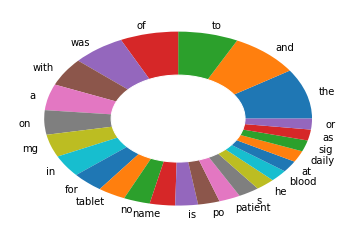

In [35]:
import itertools
from nltk.corpus import stopwords
from collections import Counter
from matplotlib import cm
words = Counter(i for i in list(itertools.chain.from_iterable(df_train.TEXT)))
print("Extracting Stopwords ...")
top_words = words.most_common(100)
stopwords_list,count = map(list,zip(*top_words))
stopwords_list += stopwords.words('english')
print("Stopwords : ",stopwords_list)

circle = plt.Circle((0,0),0.5,color = "white")
cs = cm.Set1(np.arange(25)/25.)
plt.pie(count[:25],labels = stopwords_list[:25])
p = plt.gcf()
p.gca().add_artist(circle)
plt.show()

In [36]:
sentences = df_train.TEXT

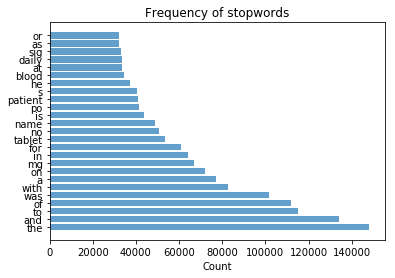

In [37]:
plt.barh(np.arange(len(stopwords_list[:25])), count[:25], align = "center", alpha = 0.7)
plt.yticks(np.arange(len(stopwords_list[:25])), stopwords_list[:25])
plt.xlabel('Count')
plt.title('Frequency of stopwords')
plt.show()

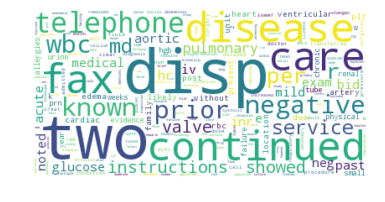

In [38]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
for i in stopwords_list:
    del words[i]
wordcloud = WordCloud(stopwords = stopwords_list,background_color = "white")
wordcloud.generate_from_frequencies(frequencies = words)
plt.figure()
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [68]:
print("Data modelling ...")
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(max_features = 3000, tokenizer = tokenizer_better, stop_words = stopwords_list)

df_train.TEXT = [' '.join(i) for i in df_train.TEXT]
vect.fit(df_train.TEXT)

Data modelling ...


CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=3000, min_df=1,
        ngram_range=(1, 1), preprocessor=None,
        stop_words=['the', 'and', 'to', 'of', 'was', 'with', 'a', 'on', 'mg', 'in', 'for', 'tablet', 'no', 'name', 'is', 'po', 'patient', 's', 'he', 'blood', 'at', 'daily', 'sig', 'as', 'or', 'she', 'hospital', 'discharge', 'one', 'day', 'his', 'last', 'left', 'history', 'her', 'am', 'were', 'you', 'right',... 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"],
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=<function tokenizer_better at 0x7f769054c158>,
        vocabulary=None)

In [39]:
print("...")
# X_train_tf = vect.transform(df_train.TEXT)
# # X_valid_tf = vect.transform(df_valid.TEXT)
# print("...")
# y_train = df_train.OUTPUT_LABEL
# y_valid = df_valid.OUTPUT_LABEL

# df_test.TEXT = [tokenizer_better(i) for i in df_test.TEXT]
# df_test.TEXT = [' '.join(i) for i in df_test.TEXT]
# X_test_tf = vect.transform(df_test.TEXT)
# y_test = df_test.OUTPUT_LABEL

...


In [40]:
y_train = df_train.OUTPUT_LABEL

In [ ]:
from imblearn.over_sampling import SMOTE
# sm = SMOTE(kind='svm',random_state=42)
sm = SMOTE(random_state=42)

X_train_tf_sample,y_train_sample = sm.fit_sample(X_train_tf,y_train)

In [ ]:
print("Applying Logistic Regression ...")
from sklearn.linear_model import LogisticRegression
# clf = LogisticRegression(C = 0.0001, penalty = 'l2', random_state = 42)
# clf.fit(X_train_tf, y_train)
clf = LogisticRegression(C = 0.0001, penalty = 'l2', random_state = 42)
clf.fit(X_train_tf_sample, y_train_sample)

model = clf

y_train_preds = model.predict_proba(X_train_tf)[:,1]
y_valid_preds = model.predict_proba(X_valid_tf)[:,1]

print(y_train[:10].values)
print(y_train_preds[:10])

In [ ]:
from sklearn.metrics import average_precision_score,recall_score
average_precision_score(y_train,model.predict(X_train_tf))

In [ ]:
from sklearn.metrics import average_precision_score,recall_score
average_precision_score(y_train_sample,model.predict(X_train_tf_sample))

In [ ]:
from sklearn.metrics import average_precision_score,recall_score
average_precision_score(y_valid,model.predict(X_valid_tf))

In [ ]:
sentences = [s.split() for s in sentences]

In [41]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot

# sentences = [['this','is','a','sentence'],['hi','how','are','you'],['this','is','the','final','sentence']]
model = Word2Vec(sentences, min_count = 1)
X = model[model.wv.vocab]
# pca = PCA(n_components = 2)
# result = pca.fit_transform(X)

# pyplot.scatter(result[:,0],result[:,1])


# for i, word in enumerate(words):
#     pyplot.annotate(word, xy=(result[i, 0], result[i,1]))
# pyplot.show()

/home/shamitha/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


In [42]:
X.shape,len(sentences)
# pca = PCA(n_components = 2)
# result = pca.fit_transform(arr)

((38991, 100), 4184)

In [75]:
words = list(model.wv.vocab)
arr = []
for sentence in sentences:
    tmp = []
    for word in sentence:
        tmp.append(model[word])
    tmp = np.array(tmp)
    tmp = tmp.mean(axis = 0)
    if tmp.size == 100:
        arr.append(tmp)
    else:
        arr.append([0]*100)
arr = np.array(arr)
print(arr.shape)

/home/shamitha/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
/home/shamitha/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice.
  
/home/shamitha/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


(4184, 100)


In [93]:
print("Applying Logistic Regression ...")
from sklearn.linear_model import LogisticRegression
# clf = LogisticRegression(C = 0.0001, penalty = 'l2', random_state = 42)
# clf.fit(X_train_tf, y_train)
clf = LogisticRegression(C = 0.001, penalty = 'l2', random_state = 42)
clf.fit(arr, y_train)

model = clf

from sklearn.metrics import average_precision_score,recall_score
print(average_precision_score(y_train,model.predict(arr)))

from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_train,model.predict(arr)))

Applying Logistic Regression ...
0.5622360208465452
0.6025334608030594


/home/shamitha/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
